In [28]:
import numpy as np
import matplotlib.pyplot as plt

**1. Система Росслера**



---

Используется система Росcлера с параметрами
𝑎, 𝑏 и 𝑐. Изменяя параметр 𝑎, можно наблюдать переход от более регулярного (периодического) поведения к хаотическому режиму.

Модель Росслера имеет вид:
\begin{align}
        \rho = \left\{
        \begin{array}{cl}
        x = -y-z, \\
        y = x+ay, \\
        z = b+z(x-c).
        \end{array}
        \right.
    \end{align}

In [29]:
def rossler_deriv(state, a, b, c):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return np.array([dxdt, dydt, dzdt])

**2. Реализация метода Рунге–Кутты 4-го порядка для получения точного решения системы**



In [30]:
def rk4_step(func, state, dt, **kwargs):
    k1 = func(state, **kwargs)
    k2 = func(state + 0.5 * dt * k1, **kwargs)
    k3 = func(state + 0.5 * dt * k2, **kwargs)
    k4 = func(state + dt * k3, **kwargs)
    return state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

**3. Моделирование системы Росслера**

In [31]:
def simulate_rossler(initial_state, dt, steps, a, b, c):
    traj = np.empty((steps + 1, 3))
    traj[0] = initial_state
    state = initial_state.copy()
    for i in range(steps):
        state = rk4_step(rossler_deriv, state, dt, a=a, b=b, c=c)
        traj[i + 1] = state
    return traj

dt = 0.001       # шаг интегрирования
T = 100         # общее время моделирования
steps = int(T/dt)
t_vals = np.linspace(0, T, steps + 1)
initial_state = np.array([0.0, 1.0, 1.05])
b, c = 0.2, 5.7

# Исследуем поведение системы для разных значений a
a_values = [0.1, 0.2, 0.37]  # малое значение - более периодический режим, большое - хаотический

**4. Визуализация**

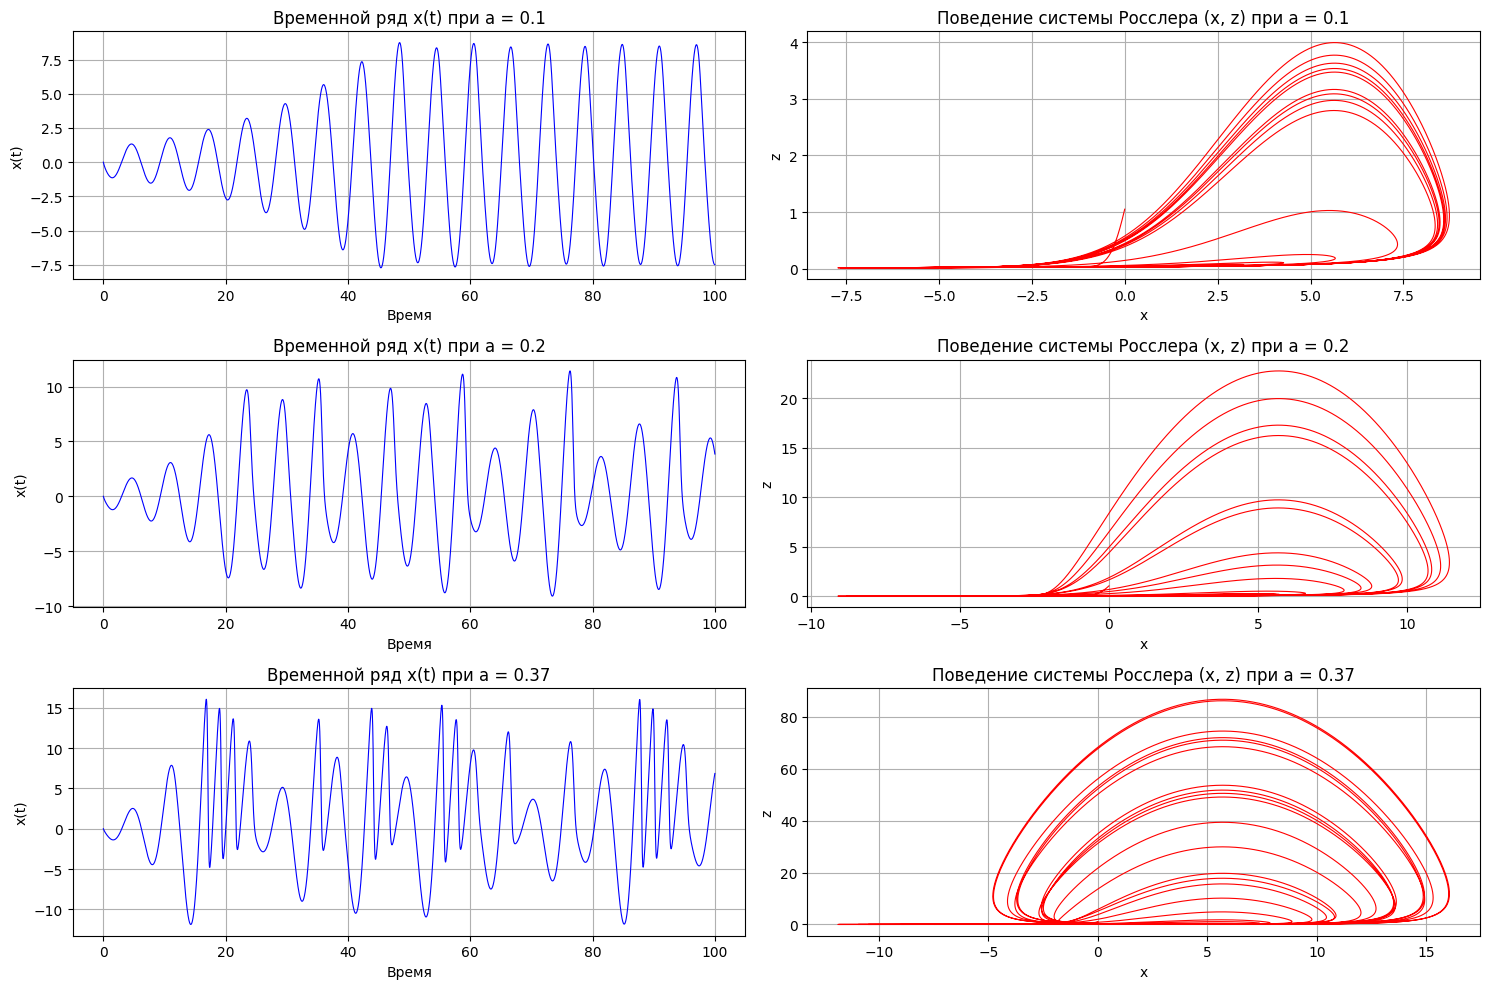

In [32]:
plt.figure(figsize=(15, 10))

for idx, a in enumerate(a_values):
    traj = simulate_rossler(initial_state, dt, steps, a, b, c)
    x = traj[:, 0]

    plt.subplot(len(a_values), 2, 2*idx+1)
    plt.plot(t_vals, x, color='blue', lw=0.8)
    plt.title(f'Временной ряд x(t) при a = {a}')
    plt.xlabel('Время')
    plt.ylabel('x(t)')
    plt.grid(True)

    plt.subplot(len(a_values), 2, 2*idx+2)
    plt.plot(traj[:, 0], traj[:, 2], color='red', lw=0.8)
    plt.title(f'Поведение системы Росслера (x, z) при a = {a}')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.grid(True)

plt.tight_layout()
plt.show()


Трехмерный график

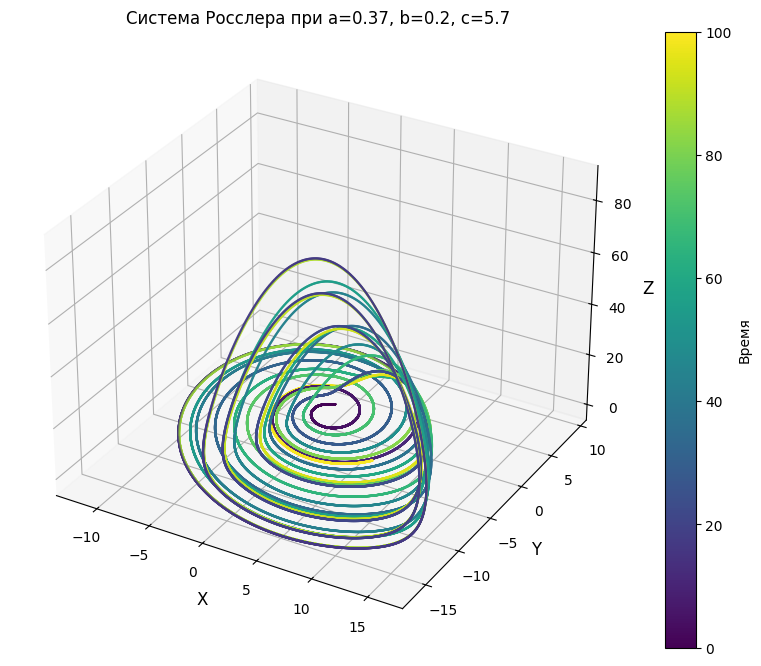

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
t_values = np.linspace(0, T, steps + 1)
sc = ax.scatter(traj[:, 0], traj[:, 1], traj[:, 2],
                c=t_values, cmap='viridis', s=0.5)
ax.set_title(f"Система Росслера при a={a}, b={b}, c={c}")
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=12)
fig.colorbar(sc, label='Время')

plt.show()